# From Text to a Knowledge Graph

Based on article: *[From Text to a Knowledge Graph. Hands-on](https://medium.com/@hugojm/from-text-to-a-knowledge-graph-hands-on-dd68e9d42939)*

Libraries: 
* [DBpedia Spotlight for SpaCy](https://spacy.io/universe/project/spacy-dbpedia-spotlight): **pip install spacy_dbpedia_spotlight**
* [Getting started with RDFLib](https://rdflib.readthedocs.io/en/stable/gettingstarted.html): **conda install -c conda-forge rdflib**

In [ ]:
import spacy
import spacy_dbpedia_spotlight
from spacy.matcher import Matcher

In [ ]:
#nlp = spacy.load("ca_core_news_sm")
nlp = spacy.load("es_core_news_sm")
nlp.add_pipe('dbpedia_spotlight')

<spacy_dbpedia_spotlight.entity_linker.EntityLinker>

In [ ]:
sentence = "Estados Unidos ha anunciado este miércoles que enviará un nuevo paquete de ayuda militar a Ucrania, por valor de 1.100 millones de dólares, consistente en armas y equipamiento castrense"
#sentence = "Autoridades prorrusas de cuatro provincias de Ucrania pidieron hoy a Moscú que las incorpore a su territorio luego de proclamar la victoria en referendos de adhesión cuestionados por Occidente"

In [ ]:
doc = nlp(sentence)

## PreProcessament 

### Tokenisation

In [ ]:
print([token.text for token in doc], sep=' ')

['Estados', 'Unidos', 'ha', 'anunciado', 'este', 'miércoles', 'que', 'enviará', 'un', 'nuevo', 'paquete', 'de', 'ayuda', 'militar', 'a', 'Ucrania', ',', 'por', 'valor', 'de', '1.100', 'millones', 'de', 'dólares', ',', 'consistente', 'en', 'armas', 'y', 'equipamiento', 'castrense']


### Lemmatisation

In [ ]:
print([token.lemma_ for token in doc], sep=' ')

['Estados', 'Unidos', 'haber', 'anunciar', 'este', 'miércoles', 'que', 'enviar', 'uno', 'nuevo', 'paquete', 'de', 'ayuda', 'militar', 'a', 'Ucrania', ',', 'por', 'valor', 'de', '1100', 'millón', 'de', 'dólares', ',', 'consistente', 'en', 'arma', 'y', 'equipamiento', 'castrense']


### Part-of-speech Tagging

In [ ]:
print([(token.lemma_, token.pos_) for token in doc], sep=' ')

[('Estados', 'PROPN'), ('Unidos', 'PROPN'), ('haber', 'AUX'), ('anunciar', 'VERB'), ('este', 'DET'), ('miércoles', 'NOUN'), ('que', 'SCONJ'), ('enviar', 'VERB'), ('uno', 'DET'), ('nuevo', 'ADJ'), ('paquete', 'NOUN'), ('de', 'ADP'), ('ayuda', 'NOUN'), ('militar', 'ADJ'), ('a', 'ADP'), ('Ucrania', 'PROPN'), (',', 'PUNCT'), ('por', 'ADP'), ('valor', 'NOUN'), ('de', 'ADP'), ('1100', 'NUM'), ('millón', 'NOUN'), ('de', 'ADP'), ('dólares', 'NOUN'), (',', 'PUNCT'), ('consistente', 'ADJ'), ('en', 'ADP'), ('arma', 'NOUN'), ('y', 'CCONJ'), ('equipamiento', 'NOUN'), ('castrense', 'ADJ')]


### Dependency Parsing

In [ ]:
print([(token.lemma_, token.dep_) for token in doc], sep=' ')

[('Estados', 'nsubj'), ('Unidos', 'flat'), ('haber', 'aux'), ('anunciar', 'ROOT'), ('este', 'det'), ('miércoles', 'obl'), ('que', 'mark'), ('enviar', 'ccomp'), ('uno', 'det'), ('nuevo', 'amod'), ('paquete', 'obj'), ('de', 'case'), ('ayuda', 'nmod'), ('militar', 'amod'), ('a', 'case'), ('Ucrania', 'nmod'), (',', 'punct'), ('por', 'case'), ('valor', 'nmod'), ('de', 'case'), ('1100', 'nummod'), ('millón', 'nmod'), ('de', 'case'), ('dólares', 'nmod'), (',', 'punct'), ('consistente', 'amod'), ('en', 'case'), ('arma', 'nmod'), ('y', 'cc'), ('equipamiento', 'conj'), ('castrense', 'amod')]


In [ ]:
from spacy import displacy
displacy.render(doc, style="dep")

### Named Entity Recognition (NER)

In [ ]:
print([(ent.text, ent.label_) for ent in doc.ents], sep=' ')

[('Estados Unidos', 'DBPEDIA_ENT'), ('Ucrania', 'DBPEDIA_ENT')]


In [ ]:
ents = [ent for ent in doc.ents]

In [ ]:
ents_t = [ent.text for ent in doc.ents]

In [ ]:
print("Before: ", [token.text for token in doc])

with doc.retokenize() as retokenizer:
    for i in range(len(ents)):
        retokenizer.merge(doc.ents[i])
print("After: ", [token.text for token in doc])

Before:  ['Estados', 'Unidos', 'ha', 'anunciado', 'este', 'miércoles', 'que', 'enviará', 'un', 'nuevo', 'paquete', 'de', 'ayuda', 'militar', 'a', 'Ucrania', ',', 'por', 'valor', 'de', '1.100', 'millones', 'de', 'dólares', ',', 'consistente', 'en', 'armas', 'y', 'equipamiento', 'castrense']
After:  ['Estados Unidos', 'ha', 'anunciado', 'este', 'miércoles', 'que', 'enviará', 'un', 'nuevo', 'paquete', 'de', 'ayuda', 'militar', 'a', 'Ucrania', ',', 'por', 'valor', 'de', '1.100', 'millones', 'de', 'dólares', ',', 'consistente', 'en', 'armas', 'y', 'equipamiento', 'castrense']


### Named Entity Linking (NEL)

In [ ]:
print([ent.kb_id_ for ent in doc.ents])

['http://es.dbpedia.org/resource/Estados_Unidos', 'http://es.dbpedia.org/resource/Ucrania']


### Relation Extraction (RE)

In [ ]:
def get_relation(sent):
    aux = []
    doc = nlp(sent)
    
    # Matcher class object
    matcher = Matcher(nlp.vocab)
    
    # define the pattern
    pattern = [[{'DEP' : 'ROOT'}],[{'DEP':'RELCL'}], [{'POS': 'VERB'}]]
    
    matcher.add("matching_1", pattern)
    
    matches = matcher(doc)
    for x in matches:
        aux.append(doc[x[1]:x[2]].text)
        
    return(aux)

In [ ]:
rels = get_relation(sentence)
print(rels)

['anunciado', 'enviará']


## Building Knowledge Graph

Finally we are going to create the final Knowledge Graph with the information we have.

In [ ]:
from rdflib import Graph, URIRef, Literal, BNode
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace

In [ ]:
g = Graph()

for ent in doc.ents:
    # add the label of the entry
    print(URIRef(ent.kb_id_))
    print(RDFS.label)
    print(Literal(ent.text))
    g.add((URIRef(ent.kb_id_), RDFS.label, Literal(ent.text)))
    prev = URIRef(ent.kb_id_)
    
g.add((URIRef('http://dbpedia.org/resource/Joe_Biden'), URIRef("https://dbpedia.org/ontology/"+rels[0]), URIRef('http://dbpedia.org/resource/Jill_Tracy'))) 
g.add((URIRef('http://dbpedia.org/resource/Jill_Tracy'), URIRef("https://dbpedia.org/ontology/"+rels[1]), URIRef('http://dbpedia.org/resource/Delaware')))

http://es.dbpedia.org/resource/Estados_Unidos
http://www.w3.org/2000/01/rdf-schema#label
Estados Unidos
http://es.dbpedia.org/resource/Ucrania
http://www.w3.org/2000/01/rdf-schema#label
Ucrania


<Graph identifier=Nca3f46d52c3d4a2f99c48fb4fa8826a6 (<class 'rdflib.graph.Graph'>)>

In [ ]:
for s,p, o in g:
    print(s,p,o)

http://es.dbpedia.org/resource/Ucrania http://www.w3.org/2000/01/rdf-schema#label Ucrania
http://dbpedia.org/resource/Joe_Biden https://dbpedia.org/ontology/anunciado http://dbpedia.org/resource/Jill_Tracy
http://dbpedia.org/resource/Jill_Tracy https://dbpedia.org/ontology/enviará http://dbpedia.org/resource/Delaware
http://es.dbpedia.org/resource/Estados_Unidos http://www.w3.org/2000/01/rdf-schema#label Estados Unidos


## Visualizing the Knowledge Graph

TypeError: '_AxesStack' object is not callable

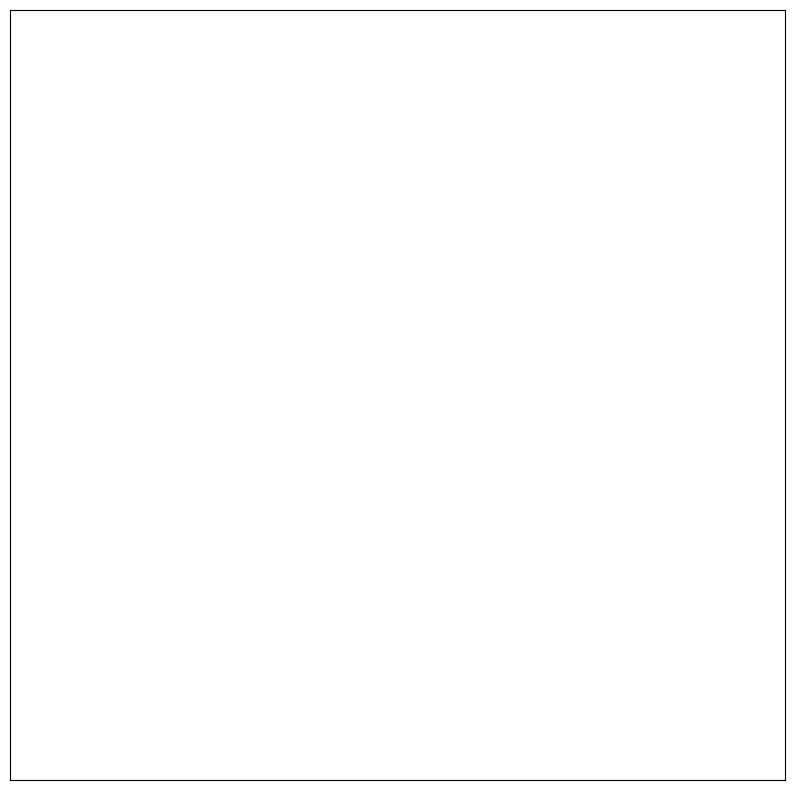

In [ ]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
#from networkx import cf
import matplotlib.pyplot as plt
%matplotlib inline

G = rdflib_to_networkx_multidigraph(g)

#  Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
plt.figure(figsize=(10,10))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

plt.show()